Duplex Analysis

In [ ]:
import gdown

url = "https://drive.google.com/file/d/1L0ivWIkVeoPCXF8KIcviMscuumwW2n9H/view"
output = "gpt4o_poems_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1L0ivWIkVeoPCXF8KIcviMscuumwW2n9H
To: /content/gpt4o_poems_clean.csv
100%|██████████| 201k/201k [00:00<00:00, 17.2MB/s]


'gpt4o_poems_clean.csv'

In [ ]:
# load in csv
import pandas as pd

duplexes_df = pd.read_csv("gpt4o_poems_clean.csv")

duplexes_df

,subject,with_brown_rules,prompt_type,poem_text
0,abuse,False,general,"In shadows deep, where silence reigns, \nVoice..."
1,abuse,False,figurative,"In shadows cast where silence grows, \nA heart..."
2,abuse,False,specific,"In the dawn's soft light, the day begins, \nWh..."
3,activities,False,general,"In morning light, we stretch and rise, \nAwake..."
4,activities,False,figurative,"In the morning light, we wake, \nChasing dream..."
...,...,...,...,...
253,weather,True,figurative,"Storm clouds gather on a distant line, \nA whi..."
254,weather,True,specific,"The rain fell heavy on the windowpane, \nEach ..."
255,youth,True,general,"In youth, we thought the sun would never set, ..."
256,youth,True,figurative,"In the mirror, time whispers back at me. \nWhe..."


In [ ]:
# print a random GPT4o duplex
import random

print(duplexes_df["poem_text"].iloc[random.randint(0, len(duplexes_df) - 1)])



In the chill of autumn, a leaf clings tight, 
Its vibrant hues whispering promises of light. 

As the winds howl and shadows creep near, 
This fragile remnant holds on to hope, not fear. 

Beneath the boughs where the chill winds sigh, 
It knows the truth of life: to live, not to die. 

Each rustle tells stories of seasons gone past, 
Yet it clings to the branch, refusing the last. 

But truth is a cycle”a dance with decay, 
In letting it go, we learn how to stay. 

When the final whistle of winter draws near, 
The leaf knows its purpose: to vanish, yet cheer. 

For in the letting go, it finds its true form, 
A promise of spring, a revival, reborn. 

So the last leaf trembles, but smiles in the fight, 
For truth lies in endings”new chapters ignite.


Calculating Average Number of Lines

In [ ]:
# as a baseline, count Brown's actual duplexes
# download them first

url = "https://drive.google.com/file/d/1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz/view?usp=drive_link"
output = "brown_poems.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz
To: /content/brown_poems.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 10.4MB/s]


'brown_poems.csv'

In [ ]:
# read them in
brown_poems_df = pd.read_csv("brown_poems.csv")

brown_poems_df

,author,poem_title,poem_text,form
0,Jericho Brown,Duplex (p. 18),A poem is a gesture toward home.\nIt makes dar...,duplex
1,Jericho Brown,Duplex (p. 27),The opposite of rape is understanding\nA field...,duplex
2,Jericho Brown,Duplex (p. 49),"I begin with love, hoping to end there.\nI don...",duplex
3,Jericho Brown,Duplex (p. 68),Don't accuse me of sleeping with your man\nWhe...,duplex
4,Jericho Brown,Duplex: Cento (p. 72),"My last love drove a burgundy car,\nColor of a...",duplex


In [ ]:
brown_poems_df["poem_length"] = brown_poems_df["poem_text"].apply(lambda poem: len([line for line in poem.split("\n") if line.strip() != ""]))

brown_poems_df["poem_length"].describe()

,poem_length
count,5.0
mean,14.0
std,0.0
min,14.0
25%,14.0
50%,14.0
75%,14.0
max,14.0


In [ ]:
# do the same for the gpt4o duplexes

duplexes_df["poem_length"] = duplexes_df["poem_text"].apply(lambda poem: len([line for line in poem.split("\n") if line.strip() != ""]))

duplexes_df["poem_length"].describe()

,poem_length
count,258.000000
mean,17.019380
std,3.162833
min,12.000000
25%,15.000000
50%,16.000000
75%,18.000000
max,35.000000


Pronoun Analysis

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 116.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# load the model
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
# clunky pronoun counting function
def count_pronouns(poem_text):
    poem = nlp(poem_text)

    # initialize counters
    counts = {
        "pronoun_count": 0,
        "plural_1_count": 0,
        "plural_2_count": 0,
        "plural_3_count": 0,
        "sing_1_count": 0,
        "sing_2_count": 0,
        "sing_3_count": 0
    }

    for token in poem:
        if token.pos_ == "PRON":
            counts["pronoun_count"] += 1

            if token.morph.get("Number") == ["Plur"]:
                if token.morph.get("Person") == ["1"]:
                    counts["plural_1_count"] += 1
                elif token.morph.get("Person") == ["2"]:
                    counts["plural_2_count"] += 1
                elif token.morph.get("Person") == ["3"]:
                    counts["plural_3_count"] += 1
            else:
                if token.morph.get("Person") == ["1"]:
                    counts["sing_1_count"] += 1
                elif token.morph.get("Person") == ["2"]:
                    counts["sing_2_count"] += 1
                elif token.morph.get("Person") == ["3"]:
                    counts["sing_3_count"] += 1

    return pd.Series(counts)

In [ ]:
# count the pronouns in Brown's poems
brown_poems_df[["pronoun_count", "plural_1_count", "plural_2_count",
                "plural_3_count", "sing_1_count", "sing_2_count",
                "sing_3_count"]] = brown_poems_df["poem_text"].apply(count_pronouns)

brown_poems_df

,author,poem_title,poem_text,form,poem_length,pronoun_count,plural_1_count,plural_2_count,plural_3_count,sing_1_count,sing_2_count,sing_3_count
0,Jericho Brown,Duplex (p. 18),A poem is a gesture toward home.\nIt makes dar...,duplex,14,14,1,0,0,8,0,5
1,Jericho Brown,Duplex (p. 27),The opposite of rape is understanding\nA field...,duplex,14,6,0,0,0,6,0,0
2,Jericho Brown,Duplex (p. 49),"I begin with love, hoping to end there.\nI don...",duplex,14,25,1,0,0,13,1,0
3,Jericho Brown,Duplex (p. 68),Don't accuse me of sleeping with your man\nWhe...,duplex,14,18,2,0,0,7,4,4
4,Jericho Brown,Duplex: Cento (p. 72),"My last love drove a burgundy car,\nColor of a...",duplex,14,12,3,0,2,5,0,2


In [ ]:
# count the pronouns in the GPT4o poems
duplexes_df[["pronoun_count", "plural_1_count", "plural_2_count",
                "plural_3_count", "sing_1_count", "sing_2_count",
                "sing_3_count"]] = duplexes_df["poem_text"].apply(count_pronouns)

duplexes_df

,subject,with_brown_rules,prompt_type,poem_text,poem_length,pronoun_count,plural_1_count,plural_2_count,plural_3_count,sing_1_count,sing_2_count,sing_3_count
0,abuse,False,general,"In shadows deep, where silence reigns, \nVoice...",18,0,0,0,0,0,0,0
1,abuse,False,figurative,"In shadows cast where silence grows, \nA heart...",16,0,0,0,0,0,0,0
2,abuse,False,specific,"In the dawn's soft light, the day begins, \nWh...",21,3,2,0,1,0,0,0
3,activities,False,general,"In morning light, we stretch and rise, \nAwake...",16,9,9,0,0,0,0,0
4,activities,False,figurative,"In the morning light, we wake, \nChasing dream...",14,7,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,weather,True,figurative,"Storm clouds gather on a distant line, \nA whi...",14,4,0,0,0,1,0,2
254,weather,True,specific,"The rain fell heavy on the windowpane, \nEach ...",16,20,0,0,0,12,0,4
255,youth,True,general,"In youth, we thought the sun would never set, ...",16,14,12,0,0,0,0,2
256,youth,True,figurative,"In the mirror, time whispers back at me. \nWhe...",15,21,6,0,0,4,1,5


In [ ]:
# get value count of duplexes_df["pronoun_count"]
duplexes_df["pronoun_count"].describe()

,pronoun_count
count,258.000000
mean,9.686047
std,5.585407
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,28.000000


In [ ]:
brown_poems_df["pronoun_count"].describe()

,pronoun_count
count,5.000000
mean,15.000000
std,7.071068
min,6.000000
25%,12.000000
50%,14.000000
75%,18.000000
max,25.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# normalizing function
def normalize_pronoun_counts(df):
    normalized_df = df.copy()

    # calculate proportions for each pronoun type
    normalized_df['plural_1_prop'] = df['plural_1_count'] / df['pronoun_count']
    normalized_df['plural_2_prop'] = df['plural_2_count'] / df['pronoun_count']
    normalized_df['plural_3_prop'] = df['plural_3_count'] / df['pronoun_count']
    normalized_df['sing_1_prop'] = df['sing_1_count'] / df['pronoun_count']
    normalized_df['sing_2_prop'] = df['sing_2_count'] / df['pronoun_count']
    normalized_df['sing_3_prop'] = df['sing_3_count'] / df['pronoun_count']

    # Replace NaN (from division by zero when pronoun_count=0) with 0
    normalized_df = normalized_df.fillna(0)

    return normalized_df

In [ ]:
# normalize both dataframes
brown_normalized = normalize_pronoun_counts(brown_poems_df)
gpt4o_normalized = normalize_pronoun_counts(duplexes_df)

# calculate mean proportions for each dataset
pronoun_types = ['plural_1_prop', 'plural_2_prop', 'plural_3_prop',
                 'sing_1_prop', 'sing_2_prop', 'sing_3_prop']

brown_means = brown_normalized[pronoun_types].mean()
gpt4o_means = gpt4o_normalized[pronoun_types].mean()

# create comparison dataframe
comparison_df = pd.DataFrame({
    'Brown Poems': brown_means,
    'GPT4o Duplexes': gpt4o_means,
    'Difference': gpt4o_means - brown_means
})

print("Average Normalized Pronoun Counts:")
print(comparison_df)
print("\n")


Average Normalized Pronoun Counts:
               Brown Poems  GPT4o Duplexes  Difference
plural_1_prop     0.094508        0.308831    0.214323
plural_2_prop     0.000000        0.000000    0.000000
plural_3_prop     0.033333        0.134413    0.101080
sing_1_prop       0.579397        0.183345   -0.396052
sing_2_prop       0.052444        0.016474   -0.035971
sing_3_prop       0.149206        0.126822   -0.022384




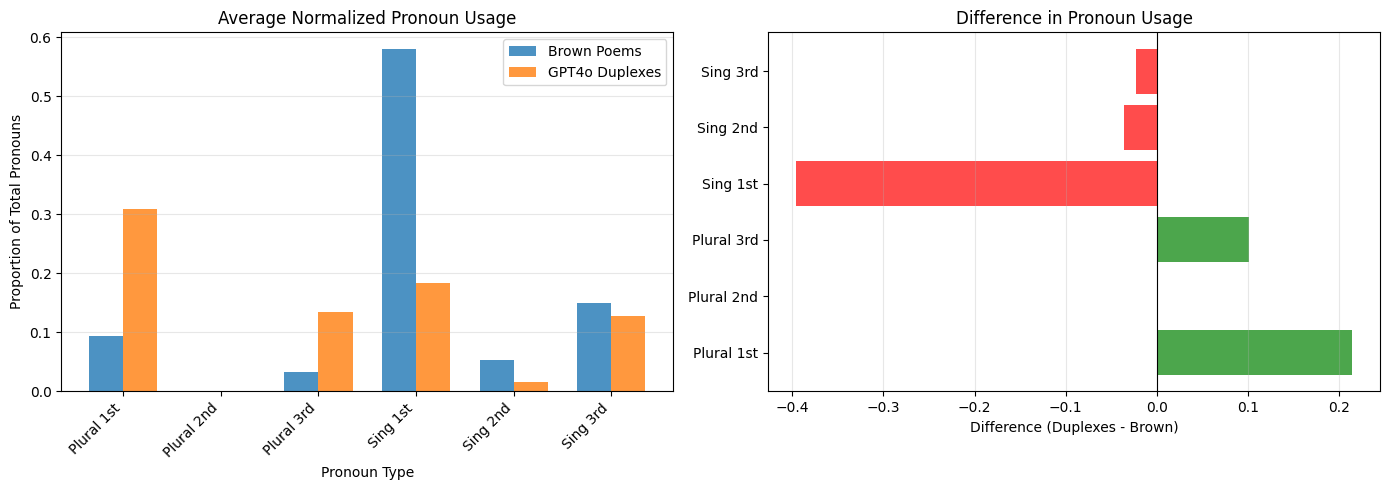

In [ ]:
# visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# bar chart comparison
labels = ['Plural 1st', 'Plural 2nd', 'Plural 3rd',
          'Sing 1st', 'Sing 2nd', 'Sing 3rd']
x = np.arange(len(labels))
width = 0.35

axes[0].bar(x - width/2, brown_means, width, label='Brown Poems', alpha=0.8)
axes[0].bar(x + width/2, gpt4o_means, width, label='GPT4o Duplexes', alpha=0.8)
axes[0].set_xlabel('Pronoun Type')
axes[0].set_ylabel('Proportion of Total Pronouns')
axes[0].set_title('Average Normalized Pronoun Usage')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Difference plot
colors = ['green' if x > 0 else 'red' for x in comparison_df['Difference']]
axes[1].barh(labels, comparison_df['Difference'], color=colors, alpha=0.7)
axes[1].set_xlabel('Difference (Duplexes - Brown)')
axes[1].set_title('Difference in Pronoun Usage')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Fighting Words

In [ ]:
# download Hessel's implementation of "fightin words"
!wget https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py

--2025-12-10 17:34:06--  https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2967 (2.9K) [text/plain]
Saving to: ‘fighting_words_py3.py’

fighting_words_py3. 100%[===================>]   2.90K  --.-KB/s    in 0s      

2025-12-10 17:34:07 (31.2 MB/s) - ‘fighting_words_py3.py’ saved [2967/2967]



In [ ]:
# import it
import fighting_words_py3

In [ ]:
# run it
brown_poems = brown_poems_df["poem_text"].tolist()
duplexes = duplexes_df["poem_text"].tolist()

results = fighting_words_py3.bayes_compare_language(
    brown_poems,
    duplexes,
    prior = .05,
)

results

Vocab size is 410
Comparing language...


[('silence', np.float64(-0.8443168926739293)),
 ('dance', np.float64(-0.8258831589410991)),
 ('laughter', np.float64(-0.811743889166979)),
 ('night', np.float64(-0.8073258111365338)),
 ('echoes', np.float64(-0.804332243401311)),
 ('through', np.float64(-0.7927159195356341)),
 ('their', np.float64(-0.7685170455566014)),
 ('beneath', np.float64(-0.7613542443771916)),
 ('hearts', np.float64(-0.757686503338783)),
 ('find', np.float64(-0.7482497939439914)),
 ('from', np.float64(-0.7363830797822816)),
 ('still', np.float64(-0.7128731991663685)),
 ('quiet', np.float64(-0.7036818803687682)),
 ('time', np.float64(-0.6941021092813633)),
 ('stories', np.float64(-0.6840993521905183)),
 ('secrets', np.float64(-0.6815280780885448)),
 ('whisper', np.float64(-0.6815280780885448)),
 ('lost', np.float64(-0.678927268520361)),
 ('soft', np.float64(-0.6654551333377868)),
 ('this', np.float64(-0.6540682663671396)),
 ('weave', np.float64(-0.6420774057909472)),
 ('embrace', np.float64(-0.6389775868611169)),
 

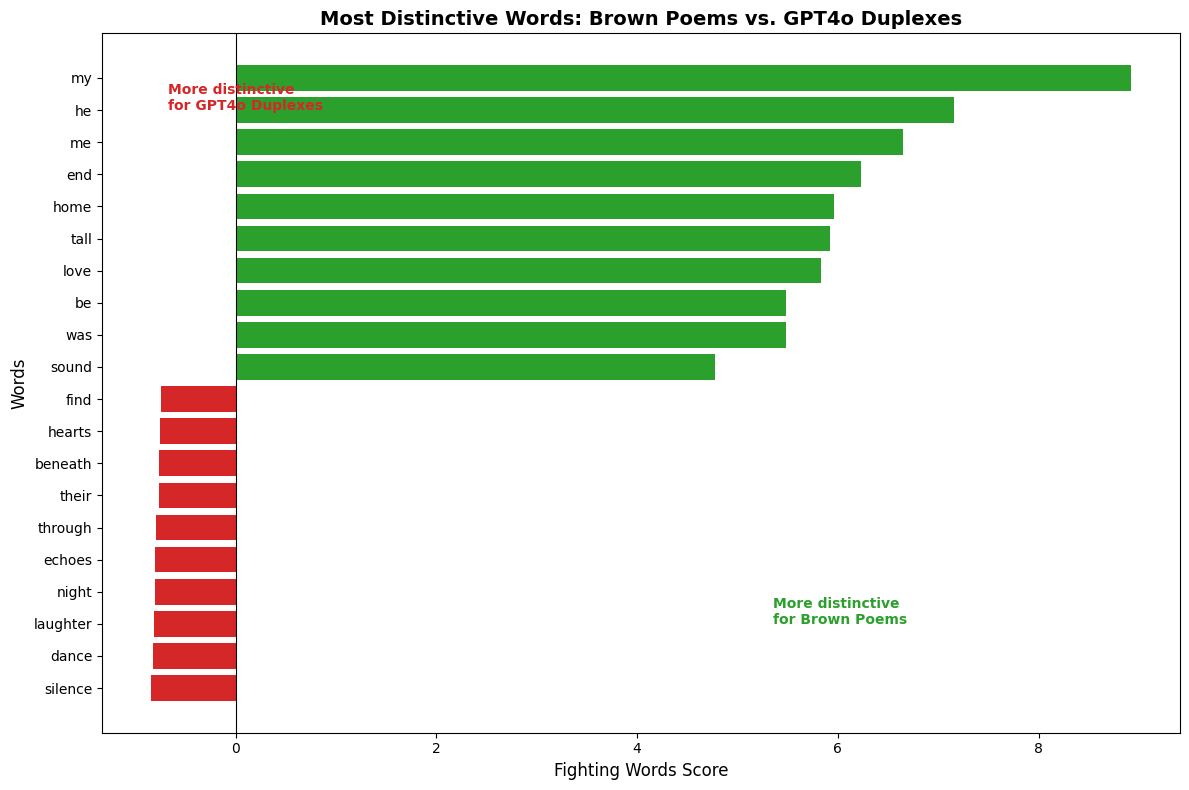

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the lowest 10 (most distinctive for gpt4o duplexes)
lowest_10 = results[:10]

# Extract the highest 10 (most distinctive for brown_poems)
highest_10 = results[-10:]

# Combine them
words_to_plot = lowest_10 + highest_10
words = [item[0] for item in words_to_plot]
scores = [float(item[1]) for item in words_to_plot]

# Create the bar chart
plt.figure(figsize=(12, 8))
colors = ['#d62728' if score < 0 else '#2ca02c' for score in scores]
bars = plt.barh(words, scores, color=colors)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Labels and title
plt.xlabel('Fighting Words Score', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Most Distinctive Words: Brown Poems vs. GPT4o Duplexes', fontsize=14, fontweight='bold')

# Add a legend
plt.text(min(scores)*0.8, len(words)-2, 'More distinctive\nfor GPT4o Duplexes',
         color='#d62728', fontsize=10, fontweight='bold')
plt.text(max(scores)*0.6, 2, 'More distinctive\nfor Brown Poems',
         color='#2ca02c', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()